## Decision tree model for Kota Bharu water level data
A building block to Random Forest is a Decision Tree. Decision trees start with a root node and end with a leaf node. For numeric feature, tree split on each unique value of each data. Tree-based models may poorly handle trends in data, compared to linear models, so I will detrend the series first.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

In [2]:
wl1 = pd.read_csv('waterlevel_lags_12months_features.csv', header=0)
wl1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.03,0.01,-0.05,0.01,0.01,0.00,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.01
1,0.01,-0.05,0.01,0.01,0.00,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.01,0.00
2,-0.05,0.01,0.01,0.00,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.01,0.00,-0.05
3,0.01,0.01,0.00,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.01,0.00,-0.05,-0.05
4,0.01,0.00,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.01,0.00,-0.05,-0.05,-0.05


In [3]:
# Split data

wl = wl1.values
# split into lagged variables and original time series
X1= wl[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = wl[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [4]:
# Columns t-1 to t-12, which are the lagged variables
X1

array([[ 0.03,  0.01, -0.05, ...,  0.02, -0.01, -0.02],
       [ 0.01, -0.05,  0.01, ..., -0.01, -0.02, -0.01],
       [-0.05,  0.01,  0.01, ..., -0.02, -0.01,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.11, ..., -0.03,  0.07, -0.01],
       [ 0.  ,  0.11, -0.01, ...,  0.07, -0.01, -0.09],
       [ 0.11, -0.01,  0.  , ..., -0.01, -0.09,  0.02]])

In [5]:
y1[0:10]

array([-0.01,  0.  , -0.05, -0.05, -0.05, -0.05, -0.02, -0.1 ,  0.02,
       -0.06])

In [6]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.80)   # Set split(80%)
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 3483
Training Observations for Target: 2786
Testing Observations for Target: 697


In [7]:
# Features Train-Test split

trainfeature_size = int(len(X1) * 0.80)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 3483
Training Observations for feature: 2786
Testing Observations for feature: 697


In [8]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_wl = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
decision_tree_wl.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_wl.score(train_feature, train_target))
print(decision_tree_wl.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0

0.9999759457048985
-0.6559759582352884


- The first value is refer to training very high
- The second value referred to testing, very poor

In [9]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. to optimize ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# Need to find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_wl = DecisionTreeRegressor(max_depth=d)
    decision_tree_wl.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_wl.score(train_feature, train_target))
    print(decision_tree_wl.score(test_feature, test_target), '\n')  # the test score is the r2 value

max_depth= 2
0.1193380100186664
-0.026775580260065324 

max_depth= 3
0.19971264514884235
0.003833802164200817 

max_depth= 4
0.27693353222452766
-0.002067453735280056 

max_depth= 5
0.36040060365321414
0.00743304202317896 

max_depth= 7
0.45709150305337687
-0.04853220007573289 

max_depth= 8
0.4895262602119298
-0.08071510622780975 

max_depth= 10
0.5863117127821845
-0.1942255373609485 



All of the test score will be compared and the highest r2 value(second value) will be chosen. In this case max_depth equals to 5 have the highest r2 value.

1.22 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


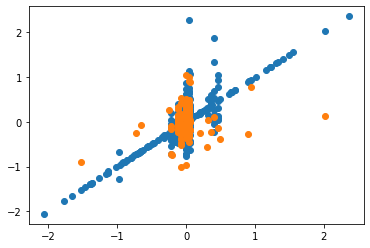

In [10]:
# Plot predicted against actual values
from matplotlib import pyplot as plt

# Use the best max_depth 
%timeit decision_tree_wl = DecisionTreeRegressor(max_depth=5)  # fill in best max depth here
decision_tree_wl.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_wl.predict(train_feature)
test_prediction = decision_tree_wl.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()

Yellow point is predicted values while blue indicates actual values. The model considered as good in the analysis.